# HW08

## Exercises to practice pandas, data analysis, regression and classification

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from os import listdir, path
from sklearn.preprocessing import OrdinalEncoder

from data_utils import object_from_json_url
from data_utils import StandardScaler
from data_utils import LFWUtils
from data_utils import LinearRegression, RandomForestClassifier, SVC
from data_utils import classification_error, display_confusion_matrix, regression_error

from image_utils import make_image, open_image

from HW08_utils import CamUtils

### Load Dataset

Let's load up the full [ANSUR](https://www.openlab.psu.edu/ansur2/) dataset that we looked at briefly in [Week 02](https://github.com/DM-GY-9103-2024F-H/WK02).

This is the dataset that has anthropometric information about U.S. Army personnel.

In [3]:
# Load Dataset
ANSUR_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/ansur.json"
ansur_data = object_from_json_url(ANSUR_FILE)

# Look at first 2 records
ansur_data[:2]

[{'age': 18,
  'gender': 'F',
  'height': 66,
  'weight': 135,
  'span': 1699,
  'stature': 1645,
  'ear': {'breadth': 30, 'length': 61, 'protrusion': 20},
  'foot': {'breadth': 97, 'length': 243},
  'hand': {'breadth': 78, 'length': 182, 'palm': 108},
  'head': {'height': 243, 'circumference': 557}},
 {'age': 30,
  'gender': 'M',
  'height': 68,
  'weight': 207,
  'span': 1749,
  'stature': 1715,
  'ear': {'breadth': 35, 'length': 63, 'protrusion': 17},
  'foot': {'breadth': 100, 'length': 252},
  'hand': {'breadth': 87, 'length': 184, 'palm': 114},
  'head': {'height': 238, 'circumference': 560}}]

#### Nested data

This is that *nested* dataset from Week 02.

# 🤔

Let's load it into a `DataFrame` to see what happens.

In [4]:
# Read into DataFrame
ansur_df = pd.DataFrame.from_records(ansur_data)
ansur_df.head()

,age,gender,height,weight,span,stature,ear,foot,hand,head
0,18,F,66,135,1699,1645,"{'breadth': 30, 'length': 61, 'protrusion': 20}","{'breadth': 97, 'length': 243}","{'breadth': 78, 'length': 182, 'palm': 108}","{'height': 243, 'circumference': 557}"
1,30,M,68,207,1749,1715,"{'breadth': 35, 'length': 63, 'protrusion': 17}","{'breadth': 100, 'length': 252}","{'breadth': 87, 'length': 184, 'palm': 114}","{'height': 238, 'circumference': 560}"
2,27,M,67,121,1684,1657,"{'breadth': 36, 'length': 59, 'protrusion': 24}","{'breadth': 92, 'length': 251}","{'breadth': 84, 'length': 180, 'palm': 103}","{'height': 239, 'circumference': 516}"
3,20,M,73,185,1878,1828,"{'breadth': 36, 'length': 60, 'protrusion': 21}","{'breadth': 104, 'length': 280}","{'breadth': 95, 'length': 201, 'palm': 124}","{'height': 270, 'circumference': 582}"
4,33,M,76,150,1977,1883,"{'breadth': 39, 'length': 65, 'protrusion': 27}","{'breadth': 101, 'length': 271}","{'breadth': 90, 'length': 194, 'palm': 113}","{'height': 254, 'circumference': 559}"



# 😓🙄

That didn't work too well. We ended up with objects in our columns.

Luckily, our `DataFrame` library has a function called [`json_normalize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) that can help.

In [10]:
# Read into DataFrame
ansur_df = pd.json_normalize(ansur_data)
ansur_df.head()

,age,gender,height,weight,span,stature,ear.breadth,ear.length,ear.protrusion,foot.breadth,foot.length,hand.breadth,hand.length,hand.palm,head.height,head.circumference
0,18,F,66,135,1699,1645,30,61,20,97,243,78,182,108,243,557
1,30,M,68,207,1749,1715,35,63,17,100,252,87,184,114,238,560
2,27,M,67,121,1684,1657,36,59,24,92,251,84,180,103,239,516
3,20,M,73,185,1878,1828,36,60,21,104,280,95,201,124,270,582
4,33,M,76,150,1977,1883,39,65,27,101,271,90,194,113,254,559


Much better. `DataFrames` are magic.

#### Data Exploration

Before we start creating models, let's do a little bit of data analysis and get a feeling for the shapes, distributions and relationships of our data.

1. Print `min`, `max` and `average` values for all of the features.
2. Print `covariance` tables for `age`, `ear.length` and `head.circumference`.
3. Plot `age`, `ear.length` and `head.circumference` versus the $1$ *feature* that is most correlated to each of them.

Don't forget to *encode* and *normalize* the data.

In [ ]:
'''
ansur_data = object_from_json_url(ANSUR_FILE)
ansur_df = pd.DataFrame.from_records(ansur_data)
'''

## Encode
gender_order = ['F', 'M']
ansur_encoder = OrdinalEncoder(categories=[gender_order])
ccc_vals = ansur_encoder.fit_transform(ansur_df[["gender"]].values)
ansur_df[["gender"]] = ccc_vals


## Normalize
ansur_scaler = StandardScaler()
ansur_scaled = ansur_scaler.fit_transform(ansur_df)

TypeError: float() argument must be a string or a real number, not 'dict'

age 
	min: 17
	max: 58
	avg: 29.745
gender 
	min: 0.0
	max: 1.0
	avg: 0.673
height 
	min: 56
	max: 94
	avg: 68.247
weight 
	min: 0
	max: 321
	avg: 174.558
span 
	min: 1323
	max: 2121
	avg: 1763.703
stature 
	min: 1409
	max: 1993
	avg: 1714.265
ear.breadth 
	min: 25
	max: 46
	avg: 35.129
ear.length 
	min: 46
	max: 81
	avg: 62.637
ear.protrusion 
	min: 13
	max: 34
	avg: 22.267
foot.breadth 
	min: 77
	max: 126
	avg: 98.851
foot.length 
	min: 198
	max: 323
	avg: 262.992
hand.breadth 
	min: 67
	max: 105
	avg: 84.937
hand.length 
	min: 145
	max: 239
	avg: 189.26
hand.palm 
	min: 88
	max: 140
	avg: 113.92
head.height 
	min: 206
	max: 295
	avg: 249.171
head.circumference 
	min: 502
	max: 635
	avg: 570.063
cov:                           age  ear.length  head.circumference
age                 75.012481   12.209246            2.230690
ear.length          12.209246   23.299281           25.129974
head.circumference   2.230690   25.129974          336.458988


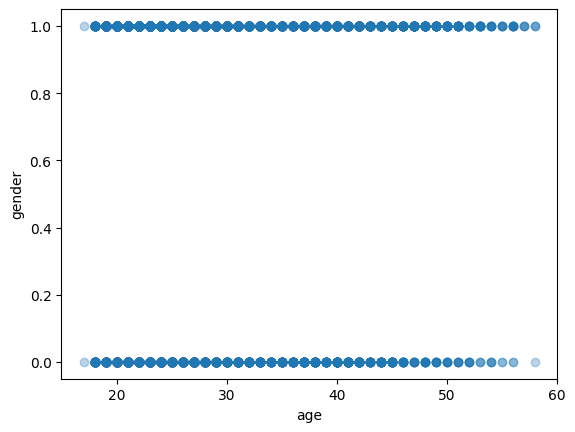

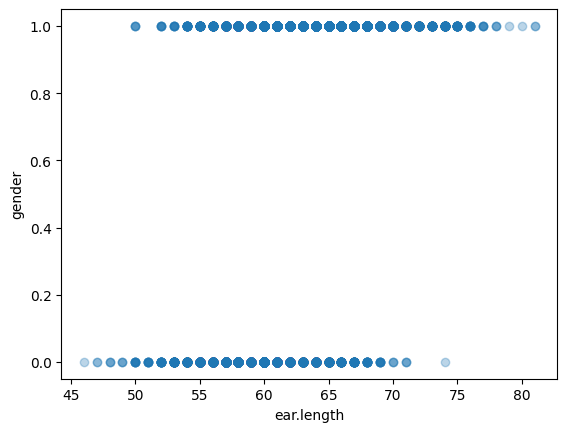

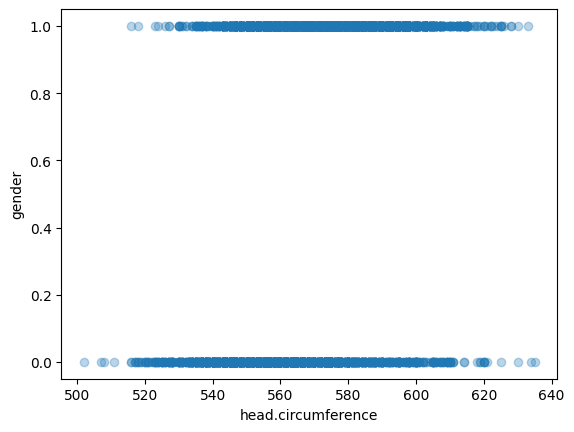

In [20]:
# Work on Data Exploration here
### Encode non-numerical features



## 1. Print min, max, avg

for c in ansur_df.columns:
  print(c, "\n\tmin:", ansur_df[c].min())
  print("\tmax:", ansur_df[c].max())
  print("\tavg:", round(ansur_df[c].mean(), 3))

#ansur.df --> already normalized 

cov_table = ansur_df[['age', 'ear.length', 'head.circumference']].cov()
print("cov:", cov_table)


for feat in ["age", "ear.length", "head.circumference"]: # ["x", "y", "z"]
  x = ansur_df[feat]
  quality_original = ansur_df["gender"]

  # Plot the original and predicted prices
  plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
  plt.xlabel(feat)
  plt.ylabel("gender")
  plt.show()





### Interpretation

<span style="color:hotpink;">
Does anything stand out about these graphs? Or the correlations?<br>
Are correlations symmetric? Does the feature most correlated to ear length also have ear length as its most correlated pair?
</span>



<span style="color:pink;">ANS: There are more males over 50 years old compared to females in this dataset. Additionally, females tend to have smaller ear lengths and head circumferences than males. This means that a smaller ear length often suggests the individual is female, and vice versa. The correlations are symmetric; however, the strength of these correlations may vary depending on the data range being considered.</span>

### Regression

Now, we want to create a regression model to predict `head.circumference` from the data.

From our [Week 08](https://github.com/DM-GY-9103-2024F-H/WK08) notebook, we can create a regression model by following these steps:

1. Load dataset (done! 🎉)
2. Encode label features as numbers (done! ⚡️)
3. Normalize the data (done! 🍾)
4. Separate the outcome variable and the input features
5. Create a regression model using all features
6. Run model on training data and measure error
7. Plot predictions and interpret results
8. Run model on test data, measure error, plot predictions, interpret results

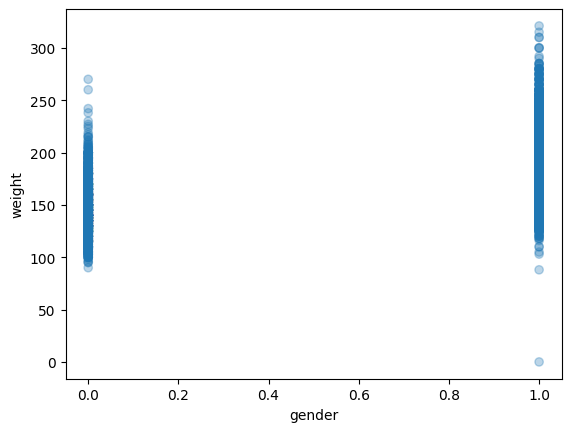

In [ ]:
# Work on Regression Model here

## Separate outcome variable and input features

## Create a regression model

## Measure error on training data

## Plot predictions and interpret results


## 4. Separate the outcome variable and the independent variables
weight = ansur_df["weight"]
gender = ansur_df[["gender"]]

# Plot the variables, just for checking
plt.scatter(gender, weight, marker='o', linestyle='', alpha=0.3)
plt.xlabel("gender")
plt.ylabel("weight")
plt.show()


## Create a LinearRegression object
weight_model = LinearRegression()

# Create a model that relates weights to gender
model =weight_model.fit(gender, weight)


### <span style="color:yellow;"> ❔QUESTION: Encoding and normalization aren't working, so the scaler isn't functioning properly. As a result, other cells that require the scaler can't run, but I'm not sure why: </span>

In [17]:
## Load Test Data
ANSUR_TEST_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/ansur-test.json"
ansur_test_data = object_from_json_url(ANSUR_TEST_FILE)
ansur_test_df = pd.json_normalize(ansur_test_data)

ansur_test_encoded_df = ansur_test_df.copy()

g_vals = ansur_encoder.transform(ansur_test_df[["gender"]].values)
ansur_test_encoded_df[["gender"]] = g_vals

ansur_test_scaled_df = ansur_scaler.transform(ansur_test_encoded_df)

AttributeError: 'OrdinalEncoder' object has no attribute '_missing_indices'

In [ ]:
## Run model on test data

## Measure error on test data

## Plot predictions and interpret results

## 6. Run the model on the training data
predicted_scaled = weight_model.predict(gender)

predicted = ansur_scaler.inverse_transform(predicted_scaled)

## 7. Measure error
regression_error(ansur_df["weight"], predicted["weight"])

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Interpretation

<span style="color:hotpink;">
How well does your classifier perform?<br>
How could you improve it?<br>
Are there ranges of circumferences that don't get predicted well?
</span>

<span style="color:hotpink;">EDIT THIS CELL WITH ANSWER</span>

## Classification

The dataset we are going to use has images from $25$ different security cameras, and our task is to separate them by camera. Some of the cameras move, some of them don't, and there are more than $1000$ images, so there's no way we want to do this by hand.

### Loading Data

If we look at the images in `./data/images/0801-500/train/`, we'll notice that they are named and organized in a very particular way. They're all in the same directory and the first part of their filename specifies which camera they came from. Even though those `ids` are numbers, they're not sequential, so we'll use some helper functions to extract a unique `label` from their filenames.

This is exactly what the `OrdinalEncoder` class does, but since we only have to encode this one column, we'll do it by hand while we read the files in.

In [ ]:
# this creates a list of all the files in a given directory, that end in .jpg
train_files = [f for f in listdir("./data/images/0801-500/train") if f.endswith(".jpg")]

In [29]:
# TODO: check and see what is inside the list here
train_files

['28-64.jpg',
 '31-05.jpg',
 '08-53.jpg',
 '01-30.jpg',
 '19-48.jpg',
 '07-85.jpg',
 '08-52.jpg',
 '21-60.jpg',
 '01-46.jpg',
 '25-71.jpg',
 '18-10.jpg',
 '18-57.jpg',
 '11-27.jpg',
 '21-28.jpg',
 '08-35.jpg',
 '17-10.jpg',
 '10-90.jpg',
 '12-44.jpg',
 '11-60.jpg',
 '06-37.jpg',
 '31-02.jpg',
 '11-74.jpg',
 '28-74.jpg',
 '22-48.jpg',
 '01-32.jpg',
 '17-81.jpg',
 '31-06.jpg',
 '17-54.jpg',
 '12-21.jpg',
 '09-65.jpg',
 '26-22.jpg',
 '06-15.jpg',
 '01-07.jpg',
 '27-47.jpg',
 '05-25.jpg',
 '12-19.jpg',
 '28-17.jpg',
 '24-10.jpg',
 '06-32.jpg',
 '28-78.jpg',
 '10-61.jpg',
 '05-02.jpg',
 '07-15.jpg',
 '05-22.jpg',
 '22-43.jpg',
 '06-47.jpg',
 '25-81.jpg',
 '19-84.jpg',
 '08-48.jpg',
 '02-24.jpg',
 '07-11.jpg',
 '19-30.jpg',
 '12-00.jpg',
 '31-13.jpg',
 '24-01.jpg',
 '27-08.jpg',
 '23-48.jpg',
 '03-20.jpg',
 '18-55.jpg',
 '13-52.jpg',
 '08-22.jpg',
 '13-47.jpg',
 '21-35.jpg',
 '27-45.jpg',
 '17-57.jpg',
 '08-19.jpg',
 '09-06.jpg',
 '26-50.jpg',
 '08-21.jpg',
 '23-64.jpg',
 '01-38.jpg',
 '03-0

Now we'll read the image pixels and extract their labels. `CamUtils.get_label()` is the helper function we'll use to "encode" and return a label id based on the filename.

In [31]:

pixel_data = []
label_data = []

for fname in train_files:
  label = CamUtils.get_label(fname)
  img = open_image(path.join("./data/images/0801-500/train", fname))
  pixel_data.append(img.pixels)
  label_data.append(label)


In [32]:
# TODO: check if labels got extracted correctly by looking at 
#       the first few items of the label list and the filename list

print("First few filenames:", train_files[:5])
print("First few labels:", label_data[:5])

First few filenames: ['28-64.jpg', '31-05.jpg', '08-53.jpg', '01-30.jpg', '19-48.jpg']
First few labels: [23, 24, 6, 0, 15]


The labels and the filenames won't match exactly since labels start at $0$ and the filenames start at $01$ and skip some numbers.

We can open some images from pixels, just to make sure we loaded them correctly:

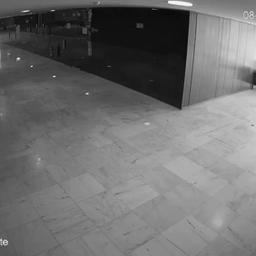

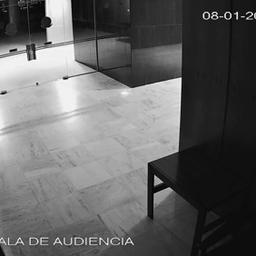

In [33]:
display(make_image(pixel_data[0], width=256))
display(make_image(pixel_data[10], width=256))

And now might not be a bad time to peek into the `data/images/0801-500/` directories to see what's inside them and what the images look like.... and get to know the data...

### DataFrame it

Let's put our raw pixel data into a `DataFrame`, and create a column for storing each image's label.

(this next cell might take a while to run)

In [34]:
train_df = pd.DataFrame(pixel_data)
train_df["label"] = label_data

Let's inspect our `DataFrame`:

In [35]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,label
0,99,99,99,99,99,99,99,99,99,99,...,113,115,111,106,105,106,108,107,106,23
1,89,89,89,91,95,98,100,100,101,101,...,50,60,50,49,58,61,55,54,60,24
2,138,129,66,121,134,55,58,47,67,72,...,180,179,179,179,179,179,179,179,179,6
3,17,17,17,17,17,17,17,17,22,22,...,66,64,65,67,68,69,69,68,67,0
4,49,53,43,50,53,49,59,53,47,50,...,182,176,181,187,188,185,181,179,179,15


### Test Files

If that worked, repeat the process for the test files inside the `./data/images/0801-500/test/` directory.

We can almost use the exact same steps as we did above to create a `DataFrame`, the only difference being that we don't have labels for these images.

In [36]:
# TODO: create a list of files in the test/ directory
test_files = [f for f in listdir("./data/images/0801-500/test") if f.endswith(".jpg")]

# TODO: check its length and content
print("Number of test files:", len(test_files))
print("First few test files:", test_files[:5])

test_pixel_data = []
# TODO: loop over files and load their pixels into a list
for fname in test_files:
    img = open_image("./data/images/0801-500/test/" + fname)
    test_pixel_data.append(img.pixels)

# TODO: load into DataFrame (this might take 20 - 30 seconds)
test_df = pd.DataFrame(test_pixel_data)



# TODO: check its length and content
print(test_df.head())



Number of test files: 1573
First few test files: ['15709132.jpg', '12405239.jpg', '10894318.jpg', '15584424.jpg', '10656623.jpg']
   0      1      2      3      4      5      6      7      8      9      ...  \
0    101    101    100    100    100     99     98     98    105    104  ...   
1    131    131    131    132    133    134    135    136    135    135  ...   
2     54     54     54     53     54     57     62     66     61     59  ...   
3    141    172    202    198    221    231    232    219    187    148  ...   
4      9     14     14     20     29     22     13     16     11     14  ...   

   65526  65527  65528  65529  65530  65531  65532  65533  65534  65535  
0    172    185    180    180    182    185    189    189    185    180  
1    149    149    149    147    145    145    145    145    143    141  
2    168    160    156    159    162    162    161    162    165    168  
3     33     34     24     25     25     25     25     25     26     26  
4      3      3    

Check the `DataFrame`

In [37]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,101,101,100,100,100,99,98,98,105,104,...,172,185,180,180,182,185,189,189,185,180
1,131,131,131,132,133,134,135,136,135,135,...,149,149,149,147,145,145,145,145,143,141
2,54,54,54,53,54,57,62,66,61,59,...,168,160,156,159,162,162,161,162,165,168
3,141,172,202,198,221,231,232,219,187,148,...,33,34,24,25,25,25,25,25,26,26
4,9,14,14,20,29,22,13,16,11,14,...,3,3,1,1,1,1,1,1,1,1


Looks like data!!

We could train a `RandomForestClassifier` directly on this `DataFrame` and see what would happen, but my guess is that Python runs out of memory and crashes our tab/browser/computer...

We'll use _projection_ to reduce the number of dimensions in our dataset. Projection is when we just drop some of the columns in our dataset. 

Which columns ? That's up to us.

Let's first try using the first $N$ columns/features where $N$ is a number around $10$.

This is how we get the first $N$ columns from a `DataFrame`:

In [38]:
# split input and output features
NUM_FEATURES = 10
chosen_columns = train_df.columns[:NUM_FEATURES]
train_features = train_df[chosen_columns]

out_features = train_df["label"]

# also separate test dataset features
test_features = test_df[chosen_columns]

From our [Week 08](https://github.com/DM-GY-9103-2024F-H/WK08) notebook, we can create a classification model by following these steps:

1. Load dataset (done! 🎉)
2. Encode label features as numbers (not needed! done! ⚡️)
3. Normalize the data (not needed! done! 🍾)
4. Separate the outcome variable and the input features (done! ☀️)
5. Create a model using chosen features
6. Run model on training data and measure error*
7. Run model on test data, measure error*, plot predictions, interpret results

*: we can use the same `regression_error()` function we used above to measure the error of our classifier model, but this could lead to $2$ issues. First, we don't have labels for the images in the test dataset, and second, the regression error reported might be higher than it actually is because an image with label $0$ that gets mislabeled as $5$ will count as being more wrong than if it was mislabeled $2$. And we don't want that. We just want to get the percentage of classifications that our model gets correctly.

To simplify calculating the classification accuracy we can use the `CamUtils.classification_accuracy()` function. This function takes $2$ parameters, a list of files and a list of predictions. It will work with the test and train datasets and will calculate a more accurate accuracy value than the one returned by `regression_error()`.



### <span style="color:yellow;"> ❔QUESTION: I'm unsure how to handle the predictions in the cell below: </span>

In [ ]:

# TODO: create a brand new classifier
# TODO: fit the model

test_model = LinearRegression()
model = test_model.fit(train_features, out_features)

# TODO: run predictions

predicted_scaled = test_model.predict(train_features)

# TODO: measure classification accuracy
CamUtils.classification_accuracy(train_files, predicted_scaled)



TypeError: argument of type 'int' is not iterable

That should look promising. Let's run this on our test dataset.

Remember we already separated the test data features into a variable called `test_features` above.

Now we just have to run the prediction and measure accuracy.

In [ ]:
# TODO: run predictions on test data
# TODO: measure classification accuracy

### Interpretation

Using just the first $10$ pixels of the image the classifier is able to label most of the images correctly.

<span style="color:hotpink">
How can we improve this classifier? How does the number of features affect the classification accuracy of the test data<br>
How does the choice of pixels affect the accuracy?<br><br>
Experiment with some of these parameters and explain your findings below.
</span>

<span style="color:hotpink;">EDIT THIS CELL WITH ANSWER</span>